In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

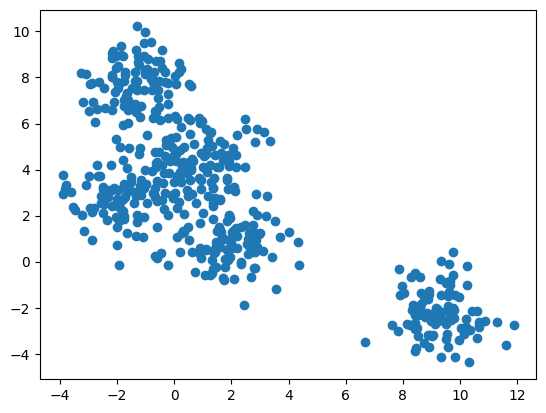

In [3]:
plt.scatter(X, Y)

In [4]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [33]:
def Distance(P1, P2):
    distance = np.sqrt((P2.x-P1.x)**2 + (P2.y-P1.y)**2)
    return distance

def Mean(AP):
    x = np.sum([centroid.x for centroid in AP])/len(AP)
    y = np.sum([centroid.y for centroid in AP])/len(AP)
    mean = Point(x, y)
    return mean

In [34]:
def MinPoint(P, AP):
    ### To find the group a point P belongs to given centroids AP
    minDistance = Distance(P, AP[0])
    minDistanceCluster = 0
    for index, centroid in enumerate(AP):
        if Distance(P, centroid)<minDistance:
            minDistance = Distance(P, centroid)
            minDistanceCluster = index

    return minDistanceCluster

In [35]:
def equality(A1, A2):
    return A1 == A2

In [36]:
def kMeans(X, Y, k):
    ### kM is the final list of k-Centroids, kMi is initial chosen random points(choose random k points from dataset), and D is dictionary of the groups, {Centroid : [Points in group]}

    n = len(X)
    PointsList = []
    for x1, y1 in zip(X, Y):
        point = Point(x1, y1)
        PointsList.append(point)
        
    kMi = list(random.sample(PointsList, k))
    kM = kMi.copy()

    D = {i: [] for i in range(k)}
    D_previous = None

    while not equality(D, D_previous):

        D_previous = D
        D = {i: [] for i in range(k)}
        
        for point in PointsList:
            nearestCluster = MinPoint(point, kM)
            D[nearestCluster].append(point)
        
        for index, centroid in enumerate(kM):
            kM[index] = Mean(D[index])

    return [kM, kMi, D]

In [37]:
def ssd_Calc(kM, D):
    ssd = 0
    for index, centroid in enumerate(kM):
        for point in D[index]:
            ssd += Distance(centroid, point)
    return ssd/len(kM)

def Elbow(X, Y):
    ### For 1 to a reasonable value, find out Sum squared distance to centroid/k, and list out in an array to find optimal k using Elbow method
    max_k = 10
    ssd = []
    for i in range(1, max_k+1):
        [kM, kMi, D] = kMeans(X, Y, k=i)
        ssd.append(ssd_Calc(kM, D))
    plt.plot(np.arange(1, max_k+1), ssd, marker='o', color='blue')
    plt.show()
    return


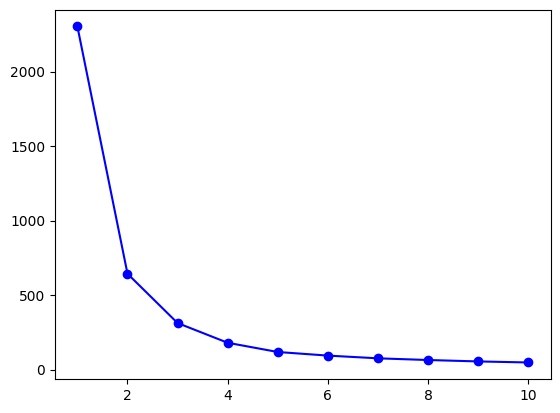

In [38]:
Elbow(X, Y)

In [39]:
[kM, kMi, D] = kMeans(X, Y, k=2)

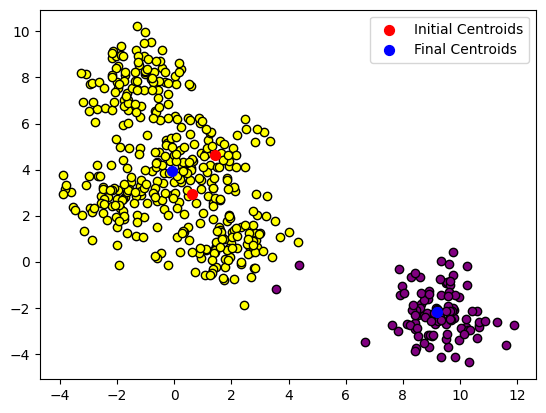

In [51]:
X_0 = [point.x for point in D[0]]
Y_0 = [point.y for point in D[0]]

X_1 = [point.x for point in D[1]]
Y_1 = [point.y for point in D[1]]

plt.scatter(X_0, Y_0, color='yellow', edgecolors='black')
plt.scatter(X_1, Y_1, color='purple', edgecolors='black')

plt.scatter([kMi[0].x, kMi[1].x], [kMi[0].y, kMi[1].y], color='red', marker='o', s=50, label='Initial Centroids')
plt.scatter([kM[0].x, kM[1].x], [kM[0].y, kM[1].y], color='blue', marker='o', s=50, label='Final Centroids')

plt.legend()
plt.show()